In [8]:
import pandas as pd
results = pd.read_csv("BPP2_Experiment_Results.csv")

   Experiment_Set  Run_Number  Iteration    p    e  Best_Fitness  \
0               1           0          0  100  0.9      572094.0   
1               1           0        500  100  0.9      531987.5   
2               1           0       1000  100  0.9      572699.0   
3               1           0       1500  100  0.9      567971.5   
4               1           0       2000  100  0.9      571365.5   

   Average_Fitness  
0       801859.690  
1       789009.555  
2       794765.230  
3       771665.460  
4       791043.520  


In [9]:
grouped = results.groupby(['Experiment_Set'])

,Experiment_Set,Run_Number,Iteration,p,e,Best_Fitness,Average_Fitness
0,1,0,0,100,0.9,572094.0,801859.690
1,1,0,500,100,0.9,531987.5,789009.555
2,1,0,1000,100,0.9,572699.0,794765.230
3,1,0,1500,100,0.9,567971.5,771665.460
4,1,0,2000,100,0.9,571365.5,791043.520
105,2,0,0,100,0.6,572094.0,801859.690
106,2,0,500,100,0.6,530243.0,790244.755
107,2,0,1000,100,0.6,589522.0,791829.345
108,2,0,1500,100,0.6,522590.0,781739.420
109,2,0,2000,100,0.6,540005.0,782844.565


In [16]:
experiment_datasets = {}
for name, group in grouped:
    experiment_datasets[name] = group.reset_index(drop=True)

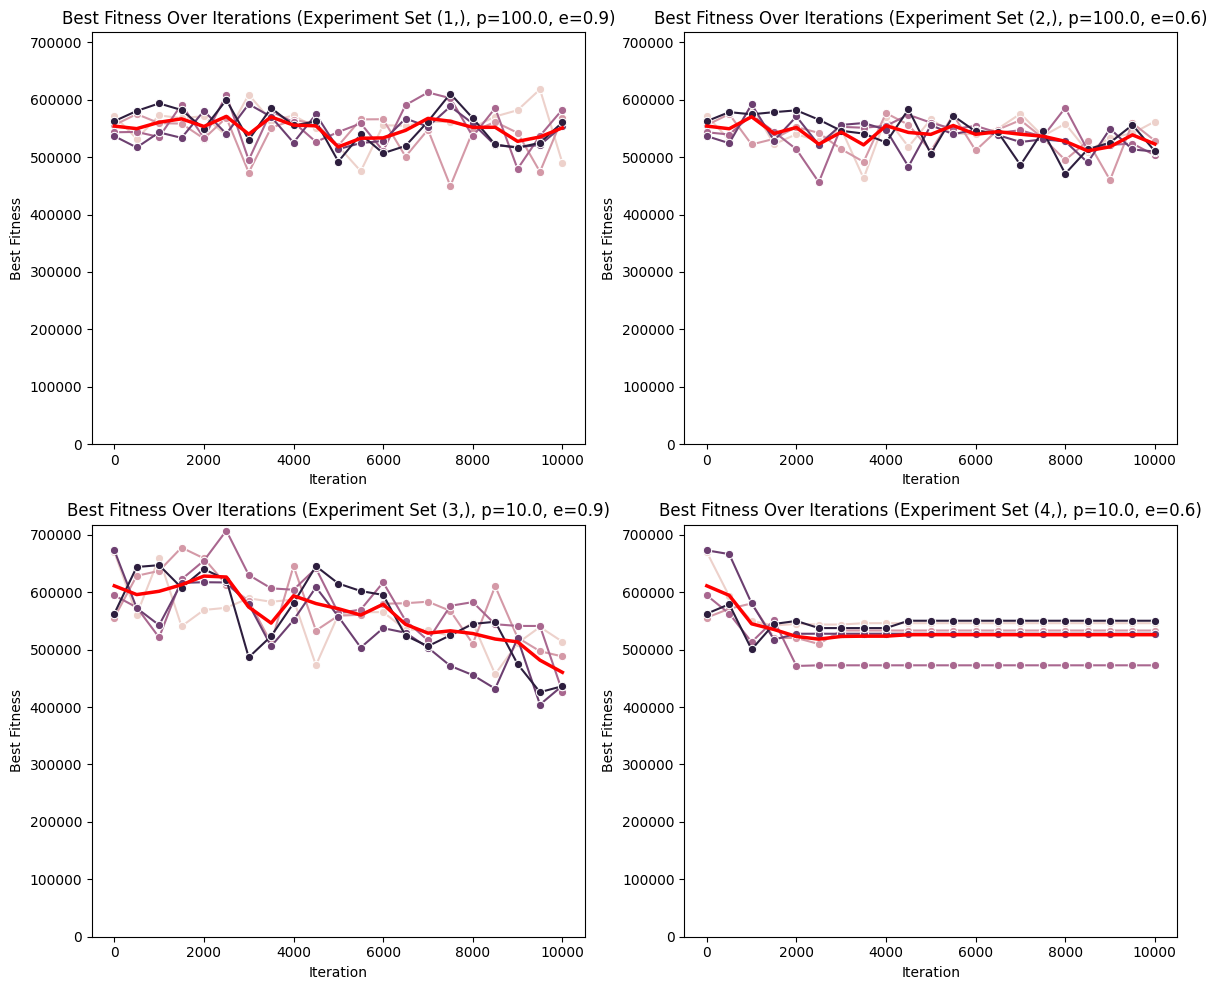

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Determine the global min and max of 'Best_Fitness' across all experiment sets
all_fitness_values = []
for exp_key in experiment_datasets.keys():
    all_fitness_values.append(experiment_datasets[exp_key]['Best_Fitness'])
global_max = max([max(values) for values in all_fitness_values])

# Plot for each experiment set
for i, exp_key in enumerate(experiment_datasets.keys()):
    dataset = experiment_datasets[exp_key]
    
    # Plot individual runs
    sns.lineplot(data=dataset, x='Iteration', y='Best_Fitness', hue='Run_Number', marker="o", ax=axs[i], legend=False)
    
    # Calculate and plot the average line
    average_fitness = dataset.groupby('Iteration')['Best_Fitness'].mean()
    axs[i].plot(average_fitness.index, average_fitness.values, color='red', linewidth=2.5, label='Average')

    # Set consistent y-axis limits
    axs[i].set_ylim(0, global_max+10000)
    
    # Title and labels
    axs[i].set_title(f'Best Fitness Over Iterations (Experiment Set {exp_key}, p={dataset.iloc[0]["p"]}, e={dataset.iloc[0]["e"]})')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel('Best Fitness')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
